Found 19 BTOR2 files and 19 C files
Loaded data for 38 files
=== BASIC STATISTICS ===
Total benchmark pairs: 19
Matching iteration counts: 19
Matching results: 19

Average iterations - BTOR2: 1.53
Average iterations - C: 1.53
=== DETAILED COMPARISON ===


,iterations_btor2,iterations_c,iterations_match,result_btor2,result_c,results_match,trace_length_btor2,trace_length_c,precision_changes_btor2,precision_changes_c,trace_length_ratio
benchmark,,,,,,,,,,,
driving_phils.1.prop1-back-serstep,2,2,True,Unsafe,Unsafe,True,1702,4,1,1,425.500000
driving_phils.1.prop1-func-interl,1,1,True,Unsafe,Unsafe,True,599,3,0,0,199.666667
driving_phils.2.prop1-back-serstep,2,2,True,Unsafe,Unsafe,True,1759,4,1,1,439.750000
driving_phils.2.prop1-func-interl,1,1,True,Unsafe,Unsafe,True,600,3,0,0,200.000000
driving_phils.3.prop1-back-serstep,2,2,True,Unsafe,Unsafe,True,2323,4,1,1,580.750000
driving_phils.3.prop1-func-interl,1,1,True,Unsafe,Unsafe,True,814,3,0,0,271.333333
driving_phils.4.prop1-back-serstep,2,2,True,Unsafe,Unsafe,True,2577,4,1,1,644.250000
driving_phils.4.prop1-func-interl,1,1,True,Unsafe,Unsafe,True,892,3,0,0,297.333333
driving_phils.5.prop1-back-serstep,2,2,True,Unsafe,Unsafe,True,2205,4,1,1,551.250000


=== SUMMARY STATISTICS ===
Iteration match rate: 100.0%
Result match rate: 100.0%
Average trace length ratio (BTOR2/C): 382.94


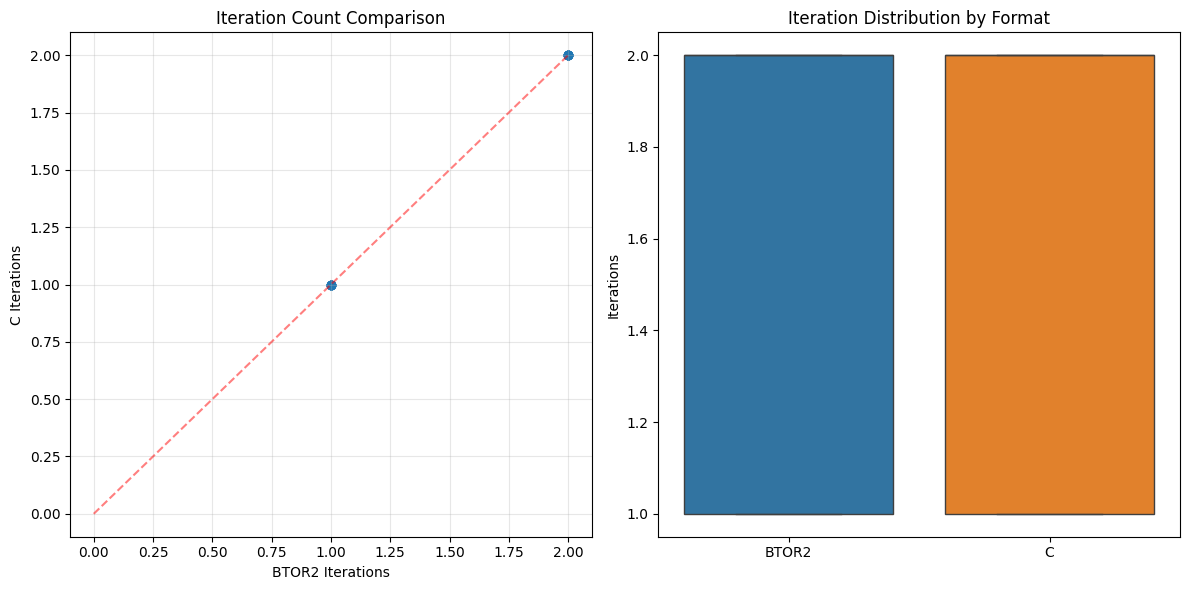

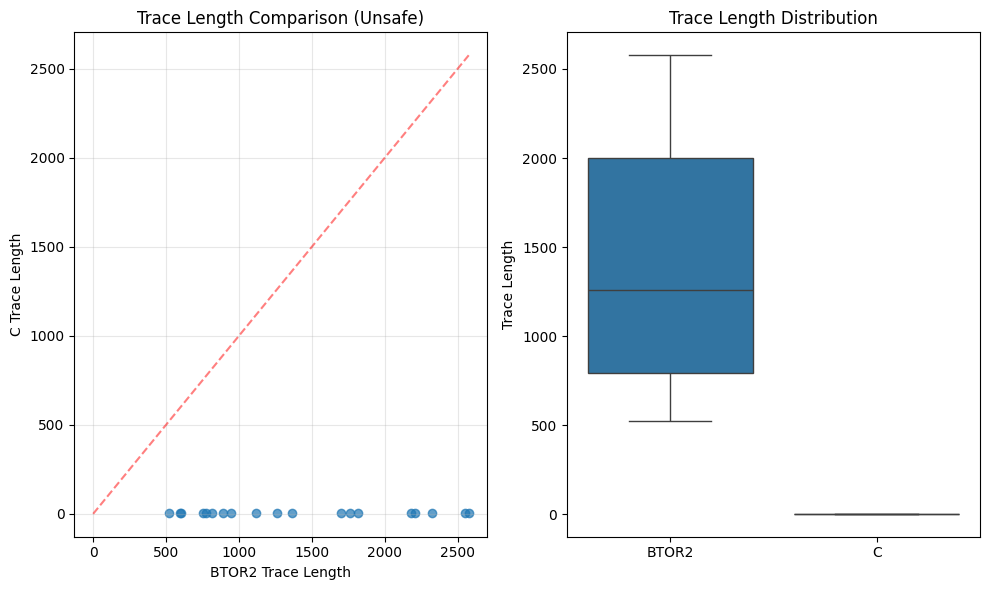

=== PERFORMANCE ANALYSIS ===
BTOR2 required fewer iterations: 0 benchmarks
C required fewer iterations: 0 benchmarks
Same iterations required: 19 benchmarks
Results exported to 'cegar_comparison_analysis.csv'
=== FINAL SUMMARY ===
Total benchmark pairs analyzed: 19
Iteration agreement: 19/19
Result agreement: 19/19


In [1]:
# %% [markdown]
# # CEGAR Log File Comparative Analysis
# 
# This notebook analyzes and compares CEGAR verification results between BTOR2 and C format files.

# %%
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

# %%
# Configuration
BTOR2_PREFIX = "btor2-expl-cegar."
C_PREFIX = "c-bit-expl-cegar."

# %%
def parse_log_file(file_path):
    """Parse a single log file and extract key metrics"""
    try:
        with open(file_path, 'r') as f:
            content = f.read()
        
        # Extract benchmark name
        if BTOR2_PREFIX in str(file_path):
            benchmark = str(file_path).split(BTOR2_PREFIX)[1].split('.yml.log')[0]
        else:
            benchmark = str(file_path).split(C_PREFIX)[1].split('.yml.log')[0]
        
        # Extract iterations
        iteration_matches = re.findall(r'Iteration \d+', content)
        iterations = len(iteration_matches) if iteration_matches else 0
        
        # Extract result
        if 'SafetyResult Unsafe' in content:
            result = 'Unsafe'
            # Extract trace length
            trace_match = re.search(r'Trace length: (\d+)', content)
            trace_length = int(trace_match.group(1)) if trace_match else 0
        elif 'SafetyResult Safe' in content:
            result = 'Safe'
            trace_length = 0
        else:
            result = 'Unknown'
            trace_length = 0
        
        # Count precision changes
        precision_changes = content.count('Precision DID change')
        
        return {
            'benchmark': benchmark,
            'iterations': iterations,
            'result': result,
            'trace_length': trace_length,
            'precision_changes': precision_changes,
            'file_type': 'BTOR2' if BTOR2_PREFIX in str(file_path) else 'C'
        }
    except Exception as e:
        print(f"Error parsing {file_path}: {e}")
        return None

# %%
def load_all_log_files(log_directory="."):
    """Load and parse all log files in the directory"""
    btor2_files = glob.glob(f"{log_directory}/{BTOR2_PREFIX}*.yml.log")
    c_files = glob.glob(f"{log_directory}/{C_PREFIX}*.yml.log")
    
    print(f"Found {len(btor2_files)} BTOR2 files and {len(c_files)} C files")
    
    all_data = []
    
    for file_path in btor2_files + c_files:
        parsed_data = parse_log_file(file_path)
        if parsed_data:
            all_data.append(parsed_data)
    
    return pd.DataFrame(all_data)

# %%
# Load all data
df = load_all_log_files("logfiles_btor2_cegar_expl")
print(f"Loaded data for {len(df)} files")

# %%
# Display first few rows
df.head(10)

# %%
# Create comparative analysis
btor2_df = df[df['file_type'] == 'BTOR2'].set_index('benchmark')
c_df = df[df['file_type'] == 'C'].set_index('benchmark')

# Merge for comparison
comparison_df = btor2_df.merge(c_df, on='benchmark', suffixes=('_btor2', '_c'))

# %%
# Basic statistics
print("=== BASIC STATISTICS ===")
print(f"Total benchmark pairs: {len(comparison_df)}")
print(f"Matching iteration counts: {len(comparison_df[comparison_df['iterations_btor2'] == comparison_df['iterations_c']])}")
print(f"Matching results: {len(comparison_df[comparison_df['result_btor2'] == comparison_df['result_c']])}")

print(f"\nAverage iterations - BTOR2: {comparison_df['iterations_btor2'].mean():.2f}")
print(f"Average iterations - C: {comparison_df['iterations_c'].mean():.2f}")

# %%
# Detailed comparison table
comparison_df['iterations_match'] = comparison_df['iterations_btor2'] == comparison_df['iterations_c']
comparison_df['results_match'] = comparison_df['result_btor2'] == comparison_df['result_c']

detailed_comparison = comparison_df[[
    'iterations_btor2', 'iterations_c', 'iterations_match',
    'result_btor2', 'result_c', 'results_match',
    'trace_length_btor2', 'trace_length_c',
    'precision_changes_btor2', 'precision_changes_c'
]].copy()

detailed_comparison['trace_length_ratio'] = detailed_comparison['trace_length_btor2'] / detailed_comparison['trace_length_c']
detailed_comparison['trace_length_ratio'] = detailed_comparison['trace_length_ratio'].replace([float('inf'), -float('inf')], float('nan'))

# %%
# Display detailed comparison
print("=== DETAILED COMPARISON ===")
display(detailed_comparison)

# %%
# Summary statistics
print("=== SUMMARY STATISTICS ===")
print(f"Iteration match rate: {detailed_comparison['iterations_match'].mean()*100:.1f}%")
print(f"Result match rate: {detailed_comparison['results_match'].mean()*100:.1f}%")

if not detailed_comparison['trace_length_ratio'].isna().all():
    print(f"Average trace length ratio (BTOR2/C): {detailed_comparison['trace_length_ratio'].mean():.2f}")

# %%
# Visualization 1: Iteration comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(comparison_df['iterations_btor2'], comparison_df['iterations_c'], alpha=0.7)
plt.plot([0, comparison_df['iterations_btor2'].max()], [0, comparison_df['iterations_btor2'].max()], 'r--', alpha=0.5)
plt.xlabel('BTOR2 Iterations')
plt.ylabel('C Iterations')
plt.title('Iteration Count Comparison')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
iteration_data = pd.DataFrame({
    'BTOR2': comparison_df['iterations_btor2'],
    'C': comparison_df['iterations_c']
})
sns.boxplot(data=iteration_data)
plt.title('Iteration Distribution by Format')
plt.ylabel('Iterations')

plt.tight_layout()
plt.show()

# %%
# Visualization 2: Trace length comparison (for unsafe results only)
unsafe_comparison = comparison_df[(comparison_df['result_btor2'] == 'Unsafe') & (comparison_df['result_c'] == 'Unsafe')]

if not unsafe_comparison.empty:
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(unsafe_comparison['trace_length_btor2'], unsafe_comparison['trace_length_c'], alpha=0.7)
    max_trace = max(unsafe_comparison['trace_length_btor2'].max(), unsafe_comparison['trace_length_c'].max())
    plt.plot([0, max_trace], [0, max_trace], 'r--', alpha=0.5)
    plt.xlabel('BTOR2 Trace Length')
    plt.ylabel('C Trace Length')
    plt.title('Trace Length Comparison (Unsafe)')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    trace_data = pd.DataFrame({
        'BTOR2': unsafe_comparison['trace_length_btor2'],
        'C': unsafe_comparison['trace_length_c']
    })
    sns.boxplot(data=trace_data)
    plt.title('Trace Length Distribution')
    plt.ylabel('Trace Length')
    
    plt.tight_layout()
    plt.show()

# %%
# Benchmark performance analysis
performance_analysis = comparison_df.copy()
performance_analysis['iteration_difference'] = performance_analysis['iterations_btor2'] - performance_analysis['iterations_c']
performance_analysis['btor2_faster'] = performance_analysis['iteration_difference'] < 0
performance_analysis['c_faster'] = performance_analysis['iteration_difference'] > 0
performance_analysis['same_speed'] = performance_analysis['iteration_difference'] == 0

print("=== PERFORMANCE ANALYSIS ===")
print(f"BTOR2 required fewer iterations: {performance_analysis['btor2_faster'].sum()} benchmarks")
print(f"C required fewer iterations: {performance_analysis['c_faster'].sum()} benchmarks")
print(f"Same iterations required: {performance_analysis['same_speed'].sum()} benchmarks")

# %%
# Export results to CSV
detailed_comparison.to_csv('cegar_comparison_analysis.csv')
print("Results exported to 'cegar_comparison_analysis.csv'")

# %%
# Final summary
print("=== FINAL SUMMARY ===")
print(f"Total benchmark pairs analyzed: {len(comparison_df)}")
print(f"Iteration agreement: {detailed_comparison['iterations_match'].sum()}/{len(comparison_df)}")
print(f"Result agreement: {detailed_comparison['results_match'].sum()}/{len(comparison_df)}")

# Identify any discrepancies
discrepancies = comparison_df[comparison_df['result_btor2'] != comparison_df['result_c']]
if not discrepancies.empty:
    print(f"\n⚠️  RESULT DISCREPANCIES FOUND:")
    for idx, row in discrepancies.iterrows():
        print(f"   {idx}: BTOR2={row['result_btor2']}, C={row['result_c']}")